In [1]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

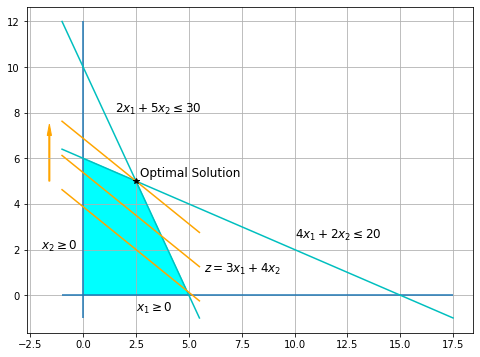

In [2]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Draw constraint lines
ax.hlines(0, -1, 17.5)
ax.vlines(0, -1, 12)
ax.plot(np.linspace(-1, 17.5, 100), 6-0.4*np.linspace(-1, 17.5, 100), color="c")
ax.plot(np.linspace(-1, 5.5, 100), 10-2*np.linspace(-1, 5.5, 100), color="c")
ax.text(1.5, 8, "$2x_1 + 5x_2 \leq 30$", size=12)
ax.text(10, 2.5, "$4x_1 + 2x_2 \leq 20$", size=12)
ax.text(-2, 2, "$x_2 \geq 0$", size=12)
ax.text(2.5, -0.7, "$x_1 \geq 0$", size=12)

# Draw the feasible region
feasible_set = Polygon(np.array([[0, 0],
                                 [0, 6],
                                 [2.5, 5],
                                 [5, 0]]),
                       color="cyan")
ax.add_patch(feasible_set)

# Draw the objective function
ax.plot(np.linspace(-1, 5.5, 100), 3.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 5.375-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 6.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.arrow(-1.6, 5, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="orange")
ax.text(5.7, 1, "$z = 3x_1 + 4x_2$", size=12)

# Draw the optimal solution
ax.plot(2.5, 5, "*", color="black")
ax.text(2.7, 5.2, "Optimal Solution", size=12)

plt.show()

In [3]:
# Construct parameters
c_ex1 = np.array([3, 4])

# Inequality constraints
A_ex1 = np.array([[2, 5],
                  [4, 2]])
b_ex1 = np.array([30,20])

# Solve the problem
# we put a negative sign on the objective as linprog does minimization
res_ex1 = linprog(-c_ex1, A_ub=A_ex1, b_ub=b_ex1)

res_ex1

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -27.5
              x: [ 2.500e+00  5.000e+00]
            nit: 2
          lower:  residual: [ 2.500e+00  5.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-6.250e-01 -4.375e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [4]:
!python -m pip install --upgrade --user -q ortools

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.14.0-unknown has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bamboolib 1.30.1 requires cryptography<3.0.0,>=2.6.1, but you have cryptography 38.0.3 which is incompatible.
bambo

In [12]:
import pandas as pd

In [13]:
dic={'Unidad':['espadachines','arqueros','jinetes'],
     'Comida':[60,80,140],'Madera':[20,10,0],
     'Oro':[0,40,100],'Potencia':[70,95,230]}

In [14]:
pd.DataFrame(dic)

,Unidad,Comida,Madera,Oro,Potencia
0,espadachines,60,20,0,70
1,arqueros,80,10,40,95
2,jinetes,140,0,100,230


In [8]:
# Import OR-Tools wrapper for linear programming
from ortools.linear_solver import pywraplp

# Create a solver using the GLOP backend
solver = pywraplp.Solver('Maximize army power', pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)

In [9]:
# Create the variables we want to optimize
swordsmen = solver.IntVar(0, solver.infinity(), 'swordsmen')
bowmen = solver.IntVar(0, solver.infinity(), 'bowmen')
horsemen = solver.IntVar(0, solver.infinity(), 'horsemen')

In [10]:
# Add constraints for each resource
solver.Add(swordsmen*60 + bowmen*80 + horsemen*140 <= 1200) # Food
solver.Add(swordsmen*20 + bowmen*10 <= 800)                 # Wood
solver.Add(bowmen*40 + horsemen*100 <= 600)                 # Gold

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x7fa27a635030> >

In [11]:
# Maximize the objective function
solver.Maximize(swordsmen*70 + bowmen*95 + horsemen*230)

In [12]:
# Solve problem
status = solver.Solve()

# If an optimal solution has been found, print results
if status == pywraplp.Solver.OPTIMAL:
  print('================= Solution =================')
  print(f'Solved in {solver.wall_time():.2f} milliseconds in {solver.iterations()} iterations')
  print()
  print(f'Optimal power = {solver.Objective().Value()} power')
  print('Army:')
  print(f' - Swordsmen = {swordsmen.solution_value()}')
  print(f' - Bowmen = {bowmen.solution_value()}')
  print(f' - Horsemen = {horsemen.solution_value()}')
else:
  print('The solver could not find an optimal solution.')

================= Solution =================
Solved in 5254.00 milliseconds in 2 iterations

Optimal power = 1800.0 power
Army:
 - Swordsmen = 6.0000000000000036
 - Bowmen = 0.0
 - Horsemen = 5.999999999999999


In [14]:
from scipy.optimize import linprog

# declare the decision variable bounds
x1_bounds = (0, None)
x2_bounds = (0, None)

# declare coefficients of the objective function 
c = [-10, -5]

# declare the inequality constraint matrix
A = [[1,  1], 
     [10, 0], 
     [0,  5]]

# declare the inequality constraint vector
b = [24, 100, 100]

# solve 
results = linprog(c=c, A_ub=A, b_ub=b, bounds=[x1_bounds, x2_bounds], method='highs-ds')

# print results
if results.status == 0: print(f'The solution is optimal.') 
print(f'Objective value: z* = {results.fun}')
print(f'Solution: x1* = {results.x[0]}, x2* = {results.x[1]}')


The solution is optimal.
Objective value: z* = -170.0
Solution: x1* = 10.0, x2* = 14.0


In [16]:
from pulp import *

model = pulp.LpProblem('linear_programming', LpMaximize)

# get solver
solver = getSolver('PULP_CBC_CMD')

# declare decision variables
x1 = LpVariable('x1', lowBound = 0, cat = 'continuous')
x2 = LpVariable('x2', lowBound = 0, cat = 'continuous')

# declare objective
model += 10*x1 + 5*x2

# declare constraints
model += x1 + x2 <= 24
model += 10*x1 <= 100
model += 5*x2 <= 100

# solve 
results = model.solve(solver=solver)

# print results
if LpStatus[results] == 'Optimal': print('The solution is optimal.')
print(f'Objective value: z* = {value(model.objective)}')
print(f'Solution: x1* = {value(x1)}, x2* = {value(x2)}')

The solution is optimal.
Objective value: z* = 170.0
Solution: x1* = 10.0, x2* = 14.0


In [20]:
from pyomo.environ import *

model = ConcreteModel('linear_programming')

# declare decision variables
model.x1 = Var(domain = NonNegativeReals)
model.x2 = Var(domain = NonNegativeReals)

# declare objective
model.obj = Objective(expr = 10*model.x1 + 5*model.x2, sense = maximize)

# declare constraints
model.c1 = Constraint(expr = model.x1 + model.x2 <= 24)
model.c2 = Constraint(expr = 10*model.x1 <= 100)
model.c3 = Constraint(expr = 5*model.x2 <= 100)

# solve
results = SolverFactory().solve(model)

# print results
if results.solver.termination_condition == TerminationCondition.optimal: print('The solution is optimal.')
print(f'Objective value: z* = {value(model.obj)}')
print(f'Solution: x1* = {value(model.x1)}, x2* = {value(model.x2)}')

AttributeError: 'SolverFactoryClass' object has no attribute 'solve'

In [18]:
from ortools.linear_solver import pywraplp

# get solver 
solver = pywraplp.Solver.CreateSolver('GLOP')

# declare decision variables
x1 = solver.NumVar(0.0, solver.infinity(), 'x1')
x2 = solver.NumVar(0.0, solver.infinity(), 'x2')

# declare objective
solver.Maximize(10*x1 + 5*x2)

# declare constraints
solver.Add(x1 + x2 <= 24)
solver.Add(10*x1 <= 100)
solver.Add(5*x2 <= 100)

# solve
results = solver.Solve()

# print results
if results == pywraplp.Solver.OPTIMAL: print(f'The solution is optimal.') 
print(f'Objective value: z* = {solver.Objective().Value()}')
print(f'Solution: x1* = {x1.solution_value()}, x2* = {x2.solution_value()}')

The solution is optimal.
Objective value: z* = 170.0
Solution: x1* = 10.0, x2* = 14.0
